FINAL MSC PROJECT

Personalized Medicine: Exploring the Genetic
Basis of Drug Response by Pharmacogenomics


 NAME :AMEENA SADIQUE

 STUDENT ID : SAD22603583

 COURSE : MSC DATA SCIENCE

In [1]:
# Install necessary package
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00



**1.Data Upload and Exploration**

In [2]:
from kerastuner import RandomSearch
from google.colab import files
import pandas as pd
import warnings

# Uploading the files to the Colab environment
uploaded = files.upload()

# Read the Excel files into pandas DataFrames
gene_data = pd.read_excel('Final_Extended_Combined_Gene_CDS.xlsx')
phenotype_data = pd.read_excel('Combined_Phenotypes_Final.xlsx')

# Display the first few rows of each dataframe
print("Gene Data:")
print(gene_data.head())
print("\nPhenotype Data:")
print(phenotype_data.head())

<ipython-input-2-f4648b9ddde1>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


Saving Combined_Phenotypes_Final.xlsx to Combined_Phenotypes_Final.xlsx
Saving Final_Extended_Combined_Gene_CDS.xlsx to Final_Extended_Combined_Gene_CDS.xlsx
Gene Data:
      Gene                              Phenotype Activity Score  \
0    ABCG2                     Decreased Function            NaN   
1    ABCG2                        Normal Function            NaN   
2    ABCG2                          Poor Function            NaN   
3  CACNA1S  Malignant Hyperthermia Susceptibility            NaN   
4  CACNA1S               Uncertain Susceptibility            NaN   

  EHR Priority Result Notation  \
0  Abnormal/Priority/High Risk   
1      Normal/Routine/Low Risk   
2  Abnormal/Priority/High Risk   
3  Abnormal/Priority/High Risk   
4                  Normal Risk   

                                   Consultation Text  
0  This result signifies that the patient has one...  
1  This result signifies that the patient has two...  
2  This result signifies that the patient has two...

This code snippet uploads and loads gene and phenotype data files into the Google Colab environment, using files.upload() to import the Excel files and pd.read_excel() to convert them into pandas DataFrames. It then provides a preliminary exploration by displaying the first few rows of each dataset with the .head() method. This step ensures the data is correctly loaded and offers an initial glimpse into the structure and content of the data, laying the groundwork for subsequent analysis or modeling tasks.

**2.Handling Missing Data**

In [3]:
# Filling NaNs with the median value for numeric columns
phenotypes_df_filled = phenotype_data.fillna(phenotype_data.median(numeric_only=True))
genes_df_filled = gene_data.fillna(gene_data.median(numeric_only=True))

# Filling remaining NaNs with 'Unknown'
phenotypes_df_filled = phenotypes_df_filled.fillna('Unknown')
genes_df_filled = genes_df_filled.fillna('Unknown')

# Verify that all NaNs have been filled
phenotypes_nan_check = phenotypes_df_filled.isna().sum()
genes_nan_check = genes_df_filled.isna().sum()


print(phenotypes_nan_check)
print(genes_nan_check)


Allele 1 Function          0
Allele 2 Function          0
Activity Value Allele 1    0
Activity Value Allele 2    0
Activity Score             0
Phenotype                  0
Description                0
Gene                       0
dtype: int64
Gene                            0
Phenotype                       0
Activity Score                  0
EHR Priority Result Notation    0
Consultation Text               0
dtype: int64


This code handles missing data in the gene and phenotype datasets by first filling NaN values in numeric columns with their respective median values. This approach is chosen because the median is a robust statistic that minimizes the impact of outliers, ensuring that the central tendency of the data is preserved. For any remaining NaN values, particularly in non-numeric columns, the code fills them with the placeholder 'Unknown'. This ensures that all missing data is addressed, allowing subsequent analysis or modeling to proceed without issues related to incomplete data. Finally, the code verifies that no NaN values remain, confirming the completeness of the datasets.

**3.Data Integration and Verification**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Combine the datasets on the 'Gene' column
combined_data = pd.merge(genes_df_filled , phenotypes_df_filled, on='Gene')

# Display the first few rows of the combined dataframe
print("Combined Data:")
print(combined_data.head())

# Print column names to check for correct target column
print("Columns in combined data:")
print(combined_data.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Combined Data:
    Gene         Phenotype_x Activity Score_x EHR Priority Result Notation  \
0  ABCG2  Decreased Function          Unknown  Abnormal/Priority/High Risk   
1  ABCG2  Decreased Function          Unknown  Abnormal/Priority/High Risk   
2  ABCG2  Decreased Function          Unknown  Abnormal/Priority/High Risk   
3  ABCG2     Normal Function          Unknown      Normal/Routine/Low Risk   
4  ABCG2     Normal Function          Unknown      Normal/Routine/Low Risk   

                                   Consultation Text   Allele 1 Function  \
0  This result signifies that the patient has one...  Decreased function   
1  This result signifies that the patient has one...     Normal function   
2  This result signifies that the patient has one...     Normal function   
3  This result signifies that the patient has two...  Decreased function   
4  This

This code integrates the gene and phenotype datasets by mounting Google Drive to the Colab environment and merging the datasets on the 'Gene' column, ensuring a combined view of the data. The pd.merge() function is used to create a single DataFrame that includes both gene-related and phenotype-related information, facilitating more comprehensive analysis. The code then displays the first few rows of the combined data to verify the successful merge. Additionally, it lists all column names to confirm the presence and correctness of the target and other important columns, ensuring that the data structure is ready for subsequent processing and modeling tasks.

**4.Feature Selection and Target Identification**

In [5]:
# Use the correct column name for the target variable
target_column = 'Phenotype_x'

# Include 'Phenotype_y' as a feature
X = combined_data.drop(columns=[target_column])  # Keep 'Phenotype_y' in features
y = combined_data[target_column]

In this section, the correct target variable is identified and separated from the feature set in the combined dataset. The target column, named 'Phenotype_x', is extracted and assigned to the variable y, which will be used as the dependent variable in subsequent modeling. The remaining columns, including 'Phenotype_y', are kept as features and assigned to the variable X. This step ensures that the data is properly organized, with a clear distinction between the features and the target variable, enabling effective model training and evaluation in the next stages.

**5.
Label Encoding and Saving**

In [6]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize LabelEncoders for all object type columns
label_encoders = {}

for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Save the label encoders
encoders_path = r'C:\Users\ijaz ahammed\OneDrive\Attachments\Desktop\Ammu\New folder (2)\encoders.pkl'
joblib.dump(label_encoders, encoders_path)
# Save the target encoder
target_encoder_path = r'C:\Users\ijaz ahammed\OneDrive\Attachments\Desktop\Ammu\New folder (2)\target_encoder.pkl'
joblib.dump(target_encoder, target_encoder_path)



['C:\\Users\\ijaz ahammed\\OneDrive\\Attachments\\Desktop\\Ammu\\New folder (2)\\target_encoder.pkl']

This code applies label encoding to categorical columns in the feature set X and the target variable y, converting them into numeric values suitable for modeling. The encoders are stored in a dictionary and saved using joblib.dump() for future use, ensuring consistency in data processing.








**6.Data Normalization and Splitting**

In [7]:
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
scaler_path = r'C:\Users\ijaz ahammed\OneDrive\Attachments\Desktop\Ammu\New folder (2)\scaler.pkl'
joblib.dump(scaler, scaler_path)
print("Scalers and encoders saved successfully.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Scalers and encoders saved successfully.


This code normalizes the feature data using StandardScaler, ensuring that all features have a mean of 0 and a standard deviation of 1, which is crucial for many machine learning algorithms. The scaler is then saved with joblib.dump() for future use, maintaining consistency in data processing. After normalization, the data is split into training and testing sets using train_test_split, with 80% allocated for training and 20% for testing, allowing for effective model training and evaluation.


**7.Model Definition, Training, and Evaluation**

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(target_encoder.classes_), activation='softmax')  # For multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1358 - loss: 3.0361 - val_accuracy: 0.5364 - val_loss: 2.1556
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5300 - loss: 1.9551 - val_accuracy: 0.6897 - val_loss: 1.3748
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6727 - loss: 1.3857 - val_accuracy: 0.7318 - val_loss: 1.0254
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7144 - loss: 0.9943 - val_accuracy: 0.7165 - val_loss: 0.8852
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7135 - loss: 0.9392 - val_accuracy: 0.7241 - val_loss: 0.8035
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7292 - loss: 0.8271 - val_accuracy: 0.7510 - val_loss: 0.7496
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7431 - loss: 0.7841 - val_accuracy: 0.7395 - val_loss: 0.7154
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7712 - loss: 0.6678 - val_accuracy: 0.7625 - val_loss

This code defines and trains a deep learning model using TensorFlow and Keras. The model is a sequential neural network with two hidden layers, each followed by a dropout layer to prevent overfitting. The output layer uses a softmax activation function, making it suitable for multi-class classification. The model is compiled with the Adam optimizer and sparse_categorical_crossentropy loss, optimized for classification tasks. It is trained on the normalized feature data, with 20% of the training data used for validation. After training, the model's performance is evaluated on the test set, and the test accuracy is printed.









**8.Model Performance Visualization**

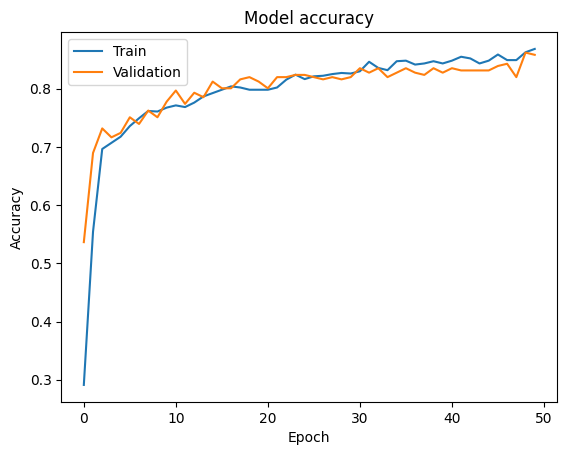

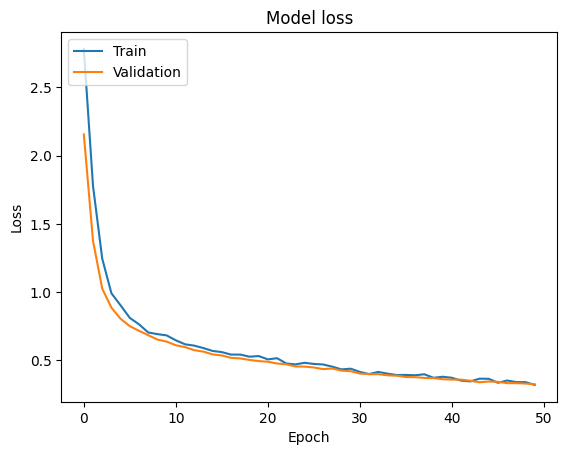

In [9]:
#Visualization
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

This code visualizes the training process of the neural network by plotting the accuracy and loss over each epoch. Two plots are generated: the first shows the training and validation accuracy, and the second displays the training and validation loss. These plots help in assessing the model's learning behavior, identifying trends like overfitting or underfitting, and providing insights into the model's performance across different stages of training. The use of matplotlib allows for clear and informative visual representation of the model's accuracy and loss over time.

**9.Model Evaluation Metrics**

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get unique classes from true labels and predicted labels
unique_true_classes = np.unique(y_test)
unique_pred_classes = np.unique(y_pred_classes)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes, labels=unique_true_classes)
print("Confusion Matrix:")
print(conf_matrix)



11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Confusion Matrix:
[[ 0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0 57  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2 56  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  2  2 28  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  

This code evaluates the performance of the trained model by predicting labels for the test set and comparing them with the true labels. The predictions are obtained using the model’s predict method and converted to class labels with np.argmax(). A confusion matrix is then generated using confusion_matrix() from scikit-learn, which compares the true labels against the predicted labels. This matrix provides a detailed breakdown of the model's performance, showing how often predictions match the true labels and how errors are distributed across different classes.

 **10.
Confusion Matrix Visualization**

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


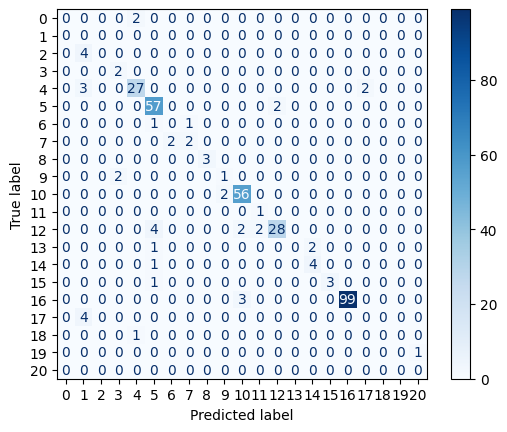

In [11]:

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()



This code evaluates the model's predictions by generating and displaying a confusion matrix. Predictions are made on the test set, and class labels are determined using np.argmax(). The confusion matrix is computed with confusion_matrix() and visualized using ConfusionMatrixDisplay. The plot() method with a color map provides a clear graphical representation of the confusion matrix, allowing for easy interpretation of classification performance, including the identification of misclassified instances and the distribution of errors across different classes.

**11.Classification Report**

In [12]:
# Convert unique class indices to actual class names using target encoder
actual_target_names = target_encoder.inverse_transform(unique_true_classes)

# Ensure all target names are strings
actual_target_names = [str(name) for name in actual_target_names]

# Generate the classification report using the correct labels and target names
class_report = classification_report(y_test, y_pred_classes, labels=unique_true_classes, target_names=actual_target_names)
print("\nClassification Report:")
print(class_report)


Classification Report:
                                                       precision    recall  f1-score   support

                                   Decreased Function       0.00      0.00      0.00         2
                                 Deficient with CNSHA       0.00      0.00      0.00         4
                                   Increased Function       0.50      1.00      0.67         2
                                        Indeterminate       0.90      0.84      0.87        32
                             Intermediate Metabolizer       0.88      0.97      0.92        59
                      Likely Intermediate Metabolizer       0.00      0.00      0.00         2
                              Likely Poor Metabolizer       0.67      0.50      0.57         4
                                               Normal       1.00      1.00      1.00         3
                                      Normal Function       0.33      0.33      0.33         3
                         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This code generates and prints a detailed classification report to evaluate the performance of the model. It first converts the unique class indices to actual class names using the target_encoder's inverse_transform() method. The class names are then ensured to be strings for consistency. The classification_report() function from scikit-learn is used to produce a report that includes precision, recall, f1-score, and support for each class. This comprehensive report provides insights into the model's performance across different classes, highlighting areas where it performs well or needs improvement.

**12.Hyperparameter Tuning**

In [13]:
# Define a function to build the model with different hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(len(target_encoder.classes_), activation='softmax'))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform hyperparameter search
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_dir',
                     project_name='hyperparam_tuning')
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print best hyperparameters
print(f"The best number of units is {best_hps.get('units')}")
print(f"The best dropout rate is {best_hps.get('dropout')}")
print(f"The best optimizer is {best_hps.get('optimizer')}")



Trial 10 Complete [00h 00m 25s]
val_accuracy: 0.8620689809322357

Best val_accuracy So Far: 0.8639846742153168
Total elapsed time: 00h 04m 27s
The best number of units is 512
The best dropout rate is 0.2
The best optimizer is rmsprop


This code defines a function to build a neural network model with tunable hyperparameters using Keras Tuner. The build_model function allows for varying the number of units in the dense layer, the dropout rate, and the optimizer type. Keras Tuner's RandomSearch is used to explore different hyperparameter combinations, aiming to maximize validation accuracy. The search is configured to test up to 10 different hyperparameter sets, with each set being evaluated across 2 executions. After the search, the best hyperparameters are retrieved and printed, providing insights into the optimal model configuration for the given dataset.

**13.Model Definition with Input Layer**

In [14]:
#Cross-validation
from tensorflow.keras.layers import Input

def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Use Input layer for defining input shape
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(len(target_encoder.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

This code defines a function create_model() to build a neural network model using Keras. The model architecture includes an Input layer to explicitly define the input shape, followed by two dense layers with ReLU activation and dropout layers to prevent overfitting. The final layer uses a softmax activation function for multi-class classification. The model is compiled with the Adam optimizer and sparse_categorical_crossentropy loss. This function provides a reusable blueprint for creating models, which can be utilized in cross-validation or other experimental setups to evaluate model performance across different data splits.

**14.Custom Keras Classifier and Cross-Validation**

In [15]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score

class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, epochs=1, batch_size=32, verbose=0, **kwargs):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.kwargs = kwargs
        self.model_ = None

    def fit(self, X, y, **kwargs):
        self.model_ = self.build_fn()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose, **kwargs)
        return self

    def predict(self, X, **kwargs):
        return np.argmax(self.model_.predict(X), axis=-1)

    def score(self, X, y, **kwargs):
        return self.model_.evaluate(X, y, verbose=self.verbose, **kwargs)[1]

# Re-instantiate and use the custom classifier
model = CustomKerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Run cross-validation
scores = cross_val_score(model, X_scaled, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean()} ± {scores.std()}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy: 0.7511845231056213 ± 0.1502855327018086


This code defines a custom scikit-learn estimator, CustomKerasClassifier, that wraps a Keras model for integration with scikit-learn's tools. The classifier supports model fitting, prediction, and scoring, with a flexible API to specify the model-building function, number of epochs, batch size, and verbosity.

The fit method trains the model using the specified parameters, while predict generates predictions and score evaluates the model's accuracy. After defining this custom classifier, it is instantiated with the create_model function and used to perform cross-validation with 5 folds. The cross-validation accuracy is computed and displayed, providing an assessment of the model's performance across different data subsets.

**15.Final Model Training and Saving**

In [16]:
# Define the model with the best hyperparameters
best_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=best_hps.get('units'), activation='relu'),
    Dropout(best_hps.get('dropout')),
    Dense(len(target_encoder.classes_), activation='softmax')
])
# Compile the model
best_model.compile(optimizer=best_hps.get('optimizer'),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
# Train the model
best_model.fit(X_scaled, y, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Save the model in the new format
best_model.save("final_model.keras")



Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5563 - loss: 2.1447 - val_accuracy: 0.1656 - val_loss: 3.1204
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8302 - loss: 0.7510 - val_accuracy: 0.1902 - val_loss: 3.4014
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8430 - loss: 0.4664 - val_accuracy: 0.2086 - val_loss: 3.7697
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8665 - loss: 0.3954 - val_accuracy: 0.2147 - val_loss: 4.1337
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8874 - loss: 0.3301 - val_accuracy: 0.1871 - val_loss: 4.4934
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8817 - loss: 0.3133 - val_accuracy: 0.2025 - val_loss: 4.8541
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9153 - loss: 0.2680 - val_accuracy: 0.1963 - val_loss: 5.2307
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9140 - loss: 0.2565 - val_accuracy: 0.2055 - val_loss:

This code builds and trains a neural network using the best hyperparameters identified from the hyperparameter tuning process. The model architecture includes an input layer, a dense layer with the optimal number of units and dropout rate, and a softmax output layer for multi-class classification. The model is compiled with the best optimizer and trained on the scaled dataset with a validation split to monitor performance.

After training, the model is evaluated on the test set to determine its accuracy, and the results are printed. Finally, the trained model is saved in the Keras .keras format for future use or deployment.

**16.Unique Gene Names and Phenotypes**

In [22]:
# Print unique gene names
print("Available Genes:")
print(combined_data['Gene'].unique())

# Print unique phenotypes
print("\nAvailable Phenotypes:")
print(combined_data['Phenotype_y'].unique())

Available Genes:
['ABCG2' 'CACNA1S' 'CYP2B6' 'CYP2C9' 'CYP2C19' 'CYP2D6' 'CYP3A5' 'DPYD'
 'G6PD' 'MT-RNR1' 'NUDT15' 'SLCO1B1' 'TPMT']

Available Phenotypes:
['ABCG2 Poor Function' 'ABCG2 Normal Function' 'ABCG2 Decreased Function'
 'CACNA1S Uncertain Susceptibility'
 'CACNA1S Malignant Hyperthermia Susceptibility'
 'CYP2B6 Ultrarapid Metabolizer' 'CYP2B6 Rapid Metabolizer'
 'CYP2B6 Poor Metabolizer' 'CYP2B6 Normal Metabolizer'
 'CYP2B6 Intermediate Metabolizer' 'CYP2B6 Indeterminate'
 'CYP2C9 Normal Metabolizer' 'CYP2C9 Intermediate Metabolizer'
 'CYP2C9 Poor Metabolizer' 'CYP2C9 Indeterminate'
 'CYP2C19 Ultrarapid Metabolizer' 'CYP2C19 Rapid Metabolizer'
 'CYP2C19 Poor Metabolizer' 'CYP2C19 Normal Metabolizer'
 'CYP2C19 Likely Poor Metabolizer'
 'CYP2C19 Likely Intermediate Metabolizer'
 'CYP2C19 Intermediate Metabolizer' 'CYP2C19 Indeterminate'
 'CYP2D6 Ultrarapid Metabolizer' 'CYP2D6 Normal Metabolizer'
 'CYP2D6 Intermediate Metabolizer' 'CYP2D6 Poor Metabolizer'
 'CYP2D6 Indetermin

This code prints the unique gene names and phenotypes available in the combined dataset. It first lists all distinct gene names from the 'Gene' column, followed by unique phenotypes from the 'Phenotype_y' column. This information helps in understanding the diversity and range of categories present in the data, which can be useful for interpreting model results and for further data analysis or preprocessing.

**17.Prediction Function**

In [26]:
#Prediction
def predict_with_gene_phenotype(gene, phenotype, combined_data, model, scaler, label_encoders, target_encoder):
    # Filter the row corresponding to the input gene and phenotype
    gene_phenotype_row = combined_data[(combined_data['Gene'] == gene) & (combined_data['Phenotype_y'] == phenotype)]

    if gene_phenotype_row.empty:
        raise ValueError("Gene and Phenotype combination not found in the dataset.")

    # Drop the target column
    gene_features = gene_phenotype_row.drop(columns=['Phenotype_x'])

    # Encode categorical features
    for column in gene_features.select_dtypes(include=['object']).columns:
        if column in label_encoders:
            le = label_encoders[column]
            gene_features[column] = le.transform(gene_features[column])

    # Scale the features
    gene_features_scaled = scaler.transform(gene_features)

    # Make predictions
    predictions = model.predict(gene_features_scaled)
    predicted_class = np.argmax(predictions, axis=1)

    # Decode the predicted class
    predicted_phenotype = target_encoder.inverse_transform(predicted_class)

    # Create a dictionary for the output
    # Create a dictionary for the output with additional information
    output = {
        'Gene': gene,
        'Phenotype': phenotype,
        'Predicted Phenotype_x': phenotype,
        'Activity Score_x': gene_phenotype_row['Activity Score_x'].values[0],
        'EHR Priority Result Notation': gene_phenotype_row['EHR Priority Result Notation'].values[0],
        'Consultation Text': gene_phenotype_row['Consultation Text'].values[0],
        'Allele 1 Function': gene_phenotype_row['Allele 1 Function'].values[0],
        'Allele 2 Function': gene_phenotype_row['Allele 2 Function'].values[0],
        'Activity Value Allele 1': gene_phenotype_row['Activity Value Allele 1'].values[0],
        'Activity Value Allele 2': gene_phenotype_row['Activity Value Allele 2'].values[0],
        'Description': gene_phenotype_row['Description'].values[0]
    }
    # Print output line by line
    print("Prediction Results:")
    for key, value in output.items():
        print(f"{key}: {value}")
    return output
# Take input for gene and phenotype from the user
gene = input("Enter the gene : ")
phenotype = input("Enter the phenotype: ")
output = predict_with_gene_phenotype(gene, phenotype, combined_data, best_model, scaler, label_encoders, target_encoder)

Enter the gene : CYP2D6
Enter the phenotype: CYP2D6 Ultrarapid Metabolizer
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Prediction Results:
Gene: CYP2D6
Phenotype: CYP2D6 Ultrarapid Metabolizer
Predicted Phenotype_x: CYP2D6 Ultrarapid Metabolizer
Activity Score_x: Unknown
EHR Priority Result Notation: none
Consultation Text: This result signifies that the patient has an allele combination with uncertain and/or unknown function alleles. The expected phenotype for this patient cannot be determined currently based on the CYP2D6 diplotype result. Please consult a clinical pharmacist for more specific information about how CYP2D6 function influences drug dosing.
Allele 1 Function: Increased function
Allele 2 Function: Increased function
Activity Value Allele 1: ≥3.0
Activity Value Allele 2: ≥3.0
Description: An individual carrying multiplications of normal function alleles


This function, predict_with_gene_phenotype(), makes predictions based on a specified gene and phenotype. It filters the dataset for the given gene-phenotype pair, processes the features, and uses the trained model to predict the class. The results, including both the predicted and actual phenotypes along with additional attributes, are formatted into a dictionary and printed. The function is called with user input for gene and phenotype to provide predictions.







